<a href="https://colab.research.google.com/github/vamsisaigarapati/btc_price_predition/blob/main/notebooks/3_further_cleaning_and%20_sentiment_columns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# prompt: list all files present in drive I just mounted

import os
print(os.listdir('/content/drive/MyDrive'))


['Share BFC-QB-OBJECTIVE.pdf', 'Share MCQ fro PSQ.xlsx', 'Share MCQ fro PSQ.pdf', 'Fourier Series-MCQ sample Questions.pdf', 'Share compressed1643041605656(1).pdf', "Share ALL UNIT'S MCQ'S (PMF).pdf", 'Share qbank_cns.pdf', 'Share qbank_cns.docx', 'cns.pdf', 'VELTECHUNI-F20220212172957902366999107201013824.pdf', ' Addhar card .pdf', 'Share Hall ticket.pdf', 'Colab Notebooks', 'sandeep.N_Resume.pdf', 'curated_final_tweets_dataset.parquet']


In [3]:
folder_path='/content/drive/MyDrive/'

In [4]:
import pandas as pd

# Load the cleaned Bitcoin tweets dataset
file_path = "/content/drive/MyDrive/curated_final_tweets_dataset.parquet"  # Update the path if needed
tweets_df = pd.read_parquet(file_path)

# Convert 'date' column to datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

# Display first few rows
tweets_df.head()



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,year_month
1,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301,1075,361,True,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,['crypto'],Twitter Web App,False,2021-02
2,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301,1075,361,True,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App,False,2021-02
3,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301,1075,361,True,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App,False,2021-02
4,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301,1075,361,True,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...","['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App,False,2021-02
5,Nick Doevendans,"Edam-Volendam, Nederland","Amateur historicus m.n. WW2, schrijver, muziek...",2020-06-12 16:50:07,37,123,410,True,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone,False,2021-02


In [5]:
# Remove duplicate tweets (if any)
tweets_df = tweets_df.drop_duplicates(subset=['text'])

# Remove unnecessary columns (modify as needed)
columns_to_keep = ['date', 'text', 'user_followers', 'is_retweet']
tweets_df = tweets_df[columns_to_keep]

# Display updated dataframe
tweets_df.head()

,date,text,user_followers,is_retweet
1,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,301,False
2,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,301,False
3,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,301,False
4,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",301,False
5,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,37,False


In [6]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters, numbers, punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text.strip()

# Apply cleaning
tweets_df['clean_text'] = tweets_df['text'].apply(clean_text)

# Display cleaned text column
tweets_df[['text', 'clean_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,clean_text
1,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,weekend read keen learn crypto assets check re...
2,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,debunking bitcoin myths cryptocurrency bitcoin...
3,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,bloomberg lp cryptooutlook cryptocurrency bitc...
4,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",blockchain cryptocurrency bitcoin crypto block...
5,#reddcoin #rdd @reddcoin to the moon #altcoin ...,reddcoin rdd moon altcoin turnreddcoinindollar...


In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment score
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']  # Extract compound score

# Apply sentiment analysis
tweets_df['sentiment_score'] = tweets_df['clean_text'].apply(get_sentiment)

# Display sentiment scores
tweets_df[['clean_text', 'sentiment_score']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,clean_text,sentiment_score
1,weekend read keen learn crypto assets check re...,0.4939
2,debunking bitcoin myths cryptocurrency bitcoin...,0.0000
3,bloomberg lp cryptooutlook cryptocurrency bitc...,0.0000
4,blockchain cryptocurrency bitcoin crypto block...,0.0000
5,reddcoin rdd moon altcoin turnreddcoinindollar...,0.0000


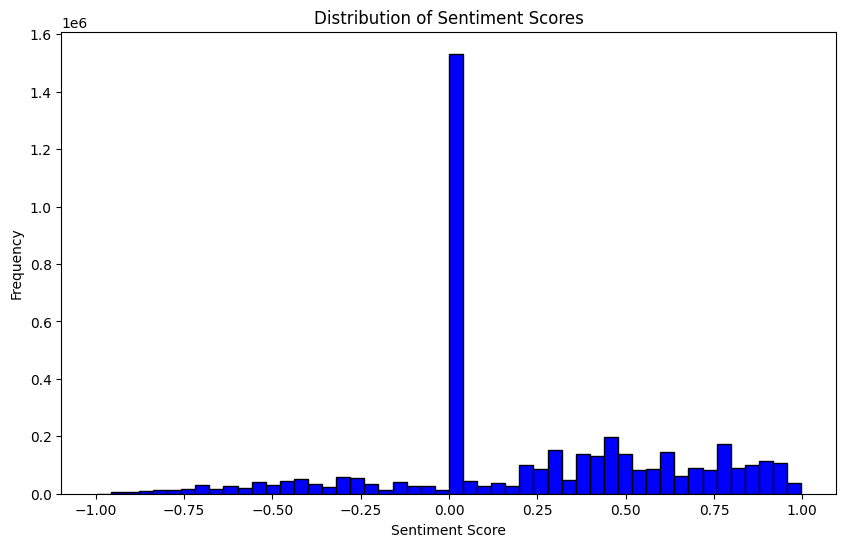

In [8]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(tweets_df['sentiment_score'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [9]:
import torch

if torch.cuda.is_available():
    print("GPU Available:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected! Check runtime settings.")

GPU Available: NVIDIA L4


In [12]:
!huggingface-cli model info mrm8488/mobilebert-finetuned-squadv2

usage: huggingface-cli <command> [<args>]
huggingface-cli: error: argument {download,upload,repo-files,env,login,whoami,logout,auth,repo,lfs-enable-largefiles,lfs-multipart-upload,scan-cache,delete-cache,tag,version,upload-large-folder}: invalid choice: 'model' (choose from 'download', 'upload', 'repo-files', 'env', 'login', 'whoami', 'logout', 'auth', 'repo', 'lfs-enable-largefiles', 'lfs-multipart-upload', 'scan-cache', 'delete-cache', 'tag', 'version', 'upload-large-folder')


In [ ]:
import torch
from transformers import pipeline
import pandas as pd
from tqdm import tqdm

# Ensure GPU is available
device = 0 if torch.cuda.is_available() else -1

# Load pre-trained sentiment analysis model on GPU
sentiment_pipeline = pipeline("sentiment-analysis", model="prajjwal1/bert-tiny", device=0)

# Batch Processing for Faster Execution
batch_size = 2048  # Adjust based on memory limits

# Convert Pandas Series to List (Avoids Pandas Overhead)
texts = tweets_df['clean_text'].tolist()

# Process using list comprehension for parallel execution
results = []
for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i + batch_size]
    batch_results = sentiment_pipeline(batch)  # GPU-accelerated batch processing
    results.extend(batch_results)

# Extract scores
tweets_df['bert_sentiment'] = [res['score'] for res in results]

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Device set to use cuda:0

 92%|█████████▏| 2015/2188 [2:59:06<15:26,  5.36s/it]

In [14]:
# prompt: once after the above cell ran save this tweets_df as parquet in the same folder above mounted

# Save the DataFrame to a Parquet file in the specified folder
output_file_path = os.path.join(folder_path, 'tweets_df_with_bert_score.parquet')
tweets_df.to_parquet(output_file_path, engine='pyarrow')
print(f"DataFrame saved to: {output_file_path}")


DataFrame saved to: /content/drive/MyDrive/tweets_df_with_bert_score.parquet


In [3]:
import pandas as pd
# Read the Parquet file from the specified folder
file_path = "../datasets/tweets_df_with_bert_score.parquet"
tweets_df = pd.read_parquet(file_path)

# Display the head of the DataFrame
tweets_df.head()

,date,text,user_followers,is_retweet,clean_text,sentiment_score,bert_sentiment
1,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,301,False,weekend read keen learn crypto assets check re...,0.4939,0.620274
2,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,301,False,debunking bitcoin myths cryptocurrency bitcoin...,0.0000,0.625587
3,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,301,False,bloomberg lp cryptooutlook cryptocurrency bitc...,0.0000,0.617598
4,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",301,False,blockchain cryptocurrency bitcoin crypto block...,0.0000,0.619153
5,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,37,False,reddcoin rdd moon altcoin turnreddcoinindollar...,0.0000,0.623843


In [15]:
# prompt: read the above parquet file again and show me the head of the df

# Assuming tweets_df is already loaded as in the previous code

tweets_df.head()


,date,text,user_followers,is_retweet,clean_text,sentiment_score,bert_sentiment
1,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,301,False,weekend read keen learn crypto assets check re...,0.4939,0.620274
2,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,301,False,debunking bitcoin myths cryptocurrency bitcoin...,0.0000,0.625587
3,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,301,False,bloomberg lp cryptooutlook cryptocurrency bitc...,0.0000,0.617598
4,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...",301,False,blockchain cryptocurrency bitcoin crypto block...,0.0000,0.619153
5,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,37,False,reddcoin rdd moon altcoin turnreddcoinindollar...,0.0000,0.623843


In [4]:
# Aggregate sentiment scores by date (mean sentiment per day)
daily_sentiment = tweets_df.groupby(tweets_df['date'].dt.date)['sentiment_score'].mean().reset_index()

# Convert 'date' back to datetime format
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Display daily sentiment scores
daily_sentiment.head()

,date,sentiment_score
0,2021-02-05,0.137524
1,2021-02-06,0.145508
2,2021-02-07,0.160835
3,2021-02-08,0.166964
4,2021-02-09,0.160324


In [5]:
# Aggregate sentiment scores by date (mean sentiment per day)
daily_sentiment = tweets_df.groupby(tweets_df['date'].dt.date).agg({
    'sentiment_score': 'mean',
    'bert_sentiment': 'mean'
}).reset_index()

# Convert 'date' back to datetime format
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Display daily sentiment scores
daily_sentiment.head()

,date,sentiment_score,bert_sentiment
0,2021-02-05,0.137524,0.607382
1,2021-02-06,0.145508,0.608538
2,2021-02-07,0.160835,0.611493
3,2021-02-08,0.166964,0.607657
4,2021-02-09,0.160324,0.609625


In [6]:
# Save the aggregated daily sentiment data
daily_sentiment.to_parquet("../datasets/daily_sentiment.parquet", index=False)

print("Processed sentiment data saved as 'daily_sentiment.parquet'.")

Processed sentiment data saved as 'daily_sentiment.parquet'.
